In [ ]:
#Assignment ONE - build a decision tree classifier
#sections to code
#   data review and correction
#   data preparation
#   build model
#   model evaluation
#   model optimization
#   make prediction
#
# add section titles, keep the running results within the notebook, and summary
#   summary at the end of the notebook to explain the key considerations for model optimization (less than fifty words)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving parkinson_disease_assignment.csv to parkinson_disease_assignment.csv


{'parkinson_disease_assignment.csv': b'name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE\r\nphon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654\r\nphon_R01_S01_2,122.4,148.65,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674\r\nphon_R01_S01_3,116.682,131.111,111.555,0.0105,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.0359,0.0827,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634\r\nphon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,

In [ ]:
df=pd.read_csv('parkinson_disease_assignment.csv')
df.keys()

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

##**Data review and correction**

In [ ]:
print(df.shape)
df.head(20)

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,NaN,0.00968,0.00008,0.00463,0.00750,0.01388,NaN,...,0.06985,0.01222,21.378,1,NaN,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,194.000000,194.000000,195.000000,195.000000,194.000000,195.000000,195.000000,194.000000,195.000000,...,194.000000,195.000000,195.000000,195.000000,193.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,196.964072,116.337711,0.006220,0.000044,0.003318,0.003446,0.009920,0.029620,0.282251,...,0.047085,0.024847,21.885974,0.753846,0.499166,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.707069,43.633633,0.004848,0.000035,0.002971,0.002759,0.008903,0.018864,0.194877,...,0.030511,0.040418,4.425764,0.431878,0.104270,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.759250,84.181500,0.003460,0.000020,0.001665,0.001860,0.004985,0.016473,0.148500,...,0.024668,0.005925,19.198000,1.000000,0.422229,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,174.402000,104.205000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022965,0.221000,...,0.038435,0.011660,22.085000,1.000000,0.497480,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,223.311500,140.532750,0.007365,0.000060,0.003853,0.003955,0.011505,0.037650,0.350000,...,0.060883,0.025640,25.075500,1.000000,0.589956,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.info

<bound method DataFrame.info of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MD

In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        1
MDVP:Flo(Hz)        1
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            1
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        1
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         1
NHR                 0
HNR                 0
status              0
RPDE                2
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
a=df['MDVP:Fhi(Hz)']
b=df['MDVP:Flo(Hz)']
c=df['MDVP:RAP']
d=df['MDVP:Shimmer']
e=df['Shimmer:DDA']
f=df['RPDE']
g=[a,b,c,d,e,f]
for i in g:
  i.fillna(i.mean(),inplace=True)
data=df.drop(columns=['name'])
data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
data.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997000,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819000,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555000,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366000,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655000,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,116.337711,0.00968,0.00008,0.00463,0.00750,0.01388,0.02962,0.456,...,0.06985,0.01222,21.378,1,0.499166,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820000,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315000,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754000,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226000,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
for col in ['status']:
  data[col]=data[col].replace('0',False).replace("1",True).astype(np.bool_)

In [ ]:
print(data.head(10))
data.dtypes

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302     74.997000         0.00784           0.00007   
1      122.400       148.650    113.819000         0.00968           0.00008   
2      116.682       131.111    111.555000         0.01050           0.00009   
3      116.676       137.871    111.366000         0.00997           0.00009   
4      116.014       141.781    110.655000         0.01284           0.00011   
5      120.552       131.162    116.337711         0.00968           0.00008   
6      120.267       137.244    114.820000         0.00333           0.00003   
7      107.332       113.840    104.315000         0.00290           0.00003   
8       95.730       132.068     91.754000         0.00551           0.00006   
9       95.056       120.103     91.226000         0.00532           0.00006   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.043

MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                 bool
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
data.status

0       True
1       True
2       True
3       True
4       True
       ...  
190    False
191    False
192    False
193    False
194    False
Name: status, Length: 195, dtype: bool

In [ ]:
print(data['status'].value_counts()) #number of people affected by parkinsons, 0=false 1=true
print(data.groupby('status').mean())
print('\n\npercentage of those affected= {:0.1f}%\npercentage of those unaffected= {:0.1f}%'.format(75.384,24.615)) #parent node

True     147
False     48
Name: status, dtype: int64
        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
False    181.937771    223.636750    145.207292        0.003866   
True     145.180762    188.254626    106.910910        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
False           0.000023  0.001972  0.002056    0.005776      0.017615   
True            0.000051  0.003757  0.003900    0.011273      0.033540   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
status                    ...                                               
False           0.162958  ...  0.013305     0.028511  0.011483  24.678750   
True            0.321204  ...  0.027600     0.053150  0.029211  20.974048   

            RPDE       DFA   spread1   spread2        D2       PPE  
sta

Data visualization in charts

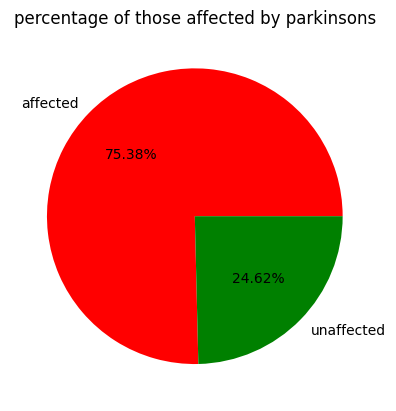

In [ ]:
import matplotlib.pyplot as plt
labels="affected","unaffected"
status=data['status'].value_counts()
sections=[status[0],status[1]]
colors = ['r', 'g']
plt.pie(sections,labels=labels,colors=colors,autopct = '%1.2f%%')
plt.title("percentage of those affected by parkinsons")
plt.show()

In [ ]:
statusmean=data.groupby('status').mean()
statusmean.T

status,False,True
MDVP:Fo(Hz),181.937771,145.180762
MDVP:Fhi(Hz),223.636750,188.254626
MDVP:Flo(Hz),145.207292,106.910910
MDVP:Jitter(%),0.003866,0.006989
MDVP:Jitter(Abs),0.000023,0.000051
MDVP:RAP,0.001972,0.003757
MDVP:PPQ,0.002056,0.003900
Jitter:DDP,0.005776,0.011273
MDVP:Shimmer,0.017615,0.033540
MDVP:Shimmer(dB),0.162958,0.321204


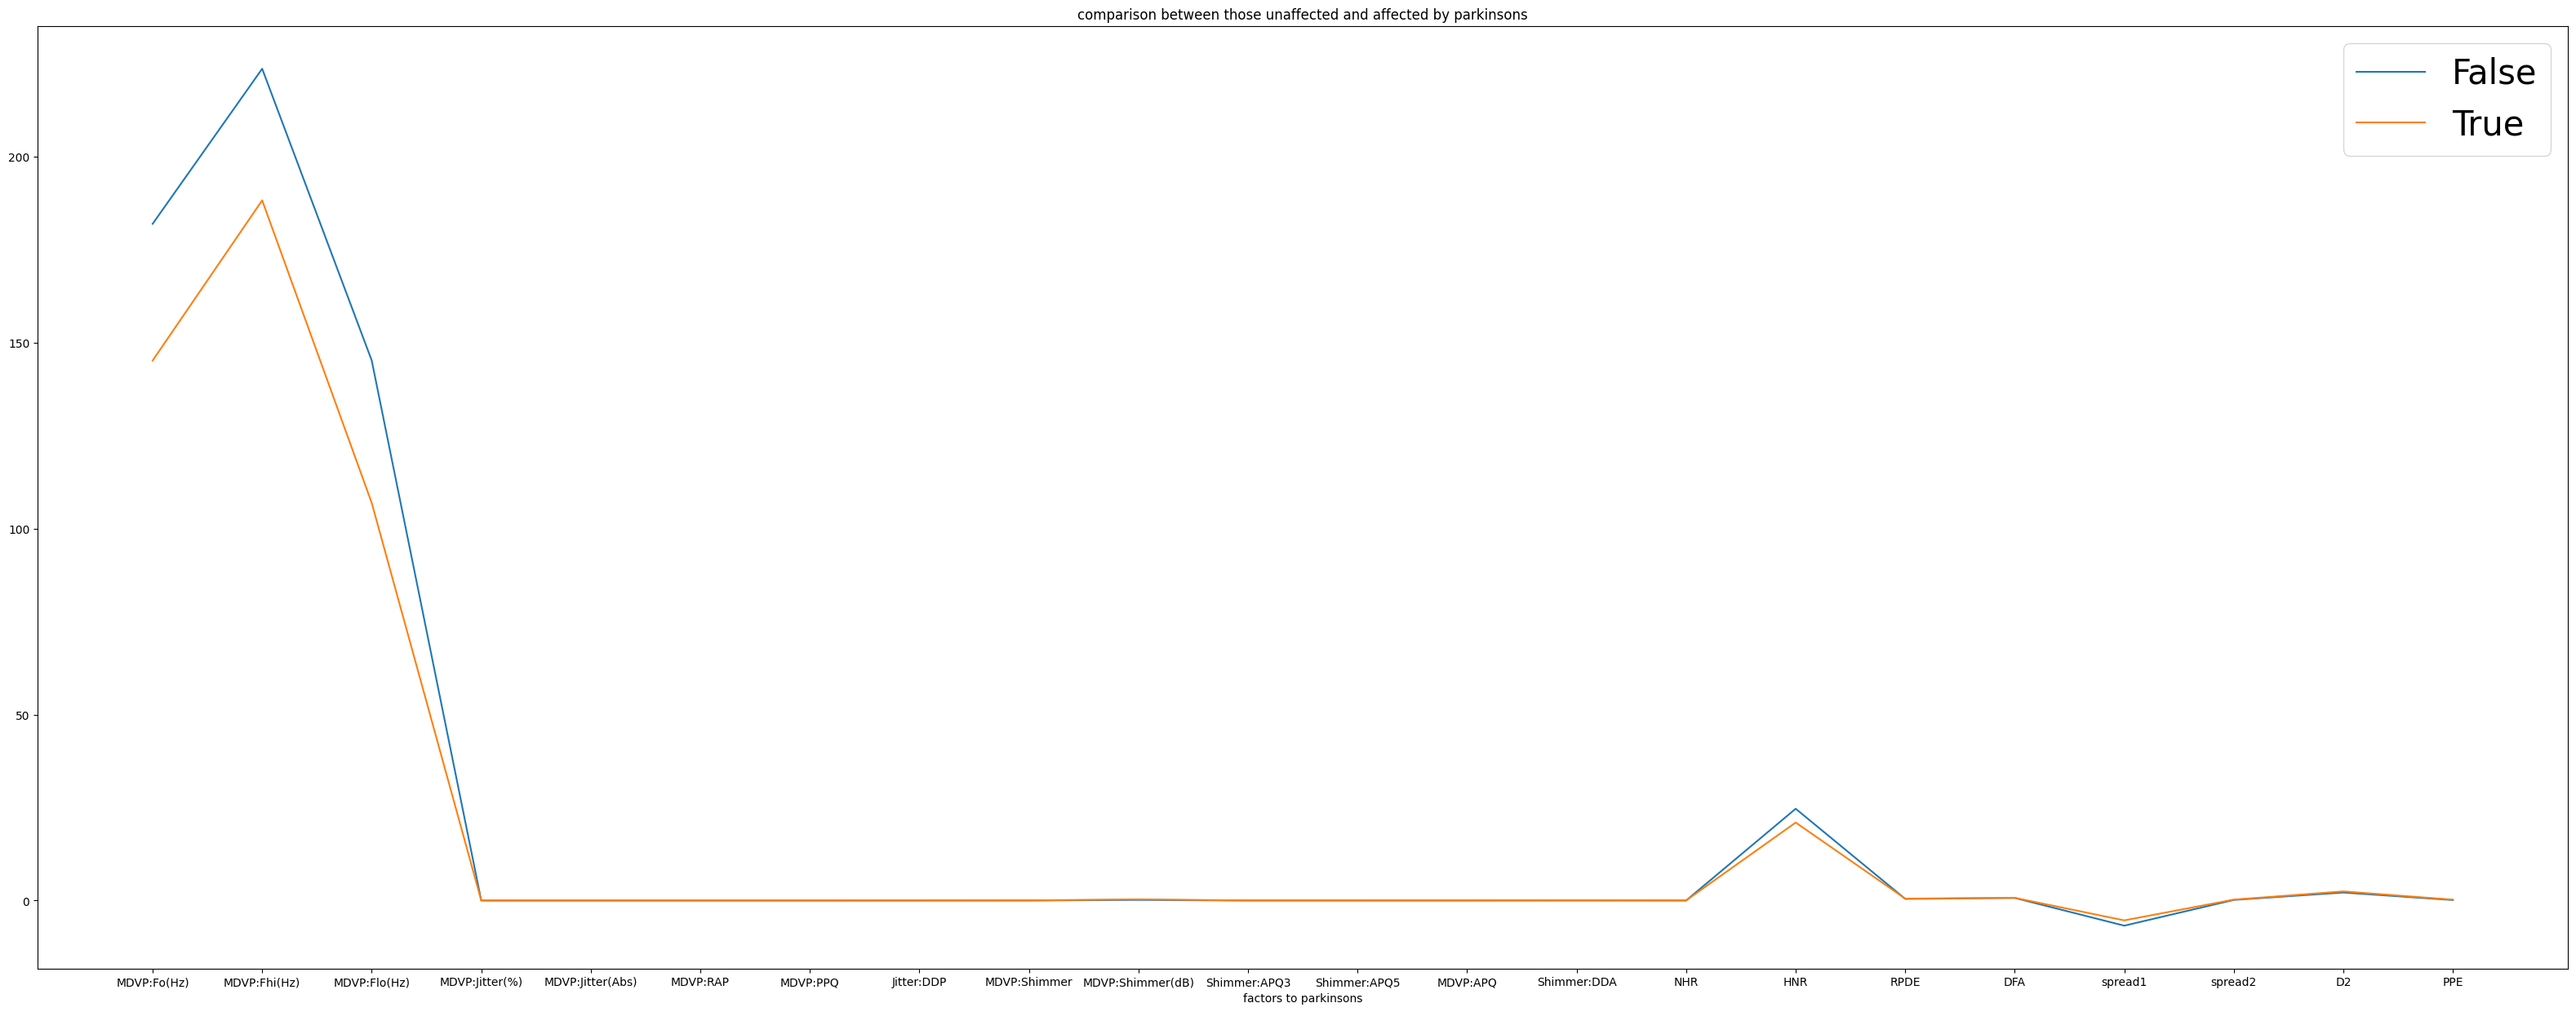

blue false, orange true
false = unaffected, true = affected by parkinsons


In [ ]:
d=statusmean.T.get(False)
u=statusmean.T.get(True)
plt.rcParams['figure.figsize'] = [40, 15]
plt.plot(d.keys(),d.array)
plt.plot(u.keys(),u.array)
plt.title("comparison between those unaffected and affected by parkinsons")
plt.xlabel("factors to parkinsons")
plt.legend(statusmean.T, prop={'size': 30})
plt.show()
print("blue false, orange true")
print("false = unaffected, true = affected by parkinsons")

##**Data Preparation**

In [ ]:
# split data to train and test sets
# split data based on the status distribution
feature_cols=[x for x in data.columns if x!='status']
print(feature_cols)
print("\nnumber of features= {}".format(len(feature_cols)))

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

number of features= 22


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X,y=data[feature_cols], data['status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.277,random_state=42, shuffle=True, stratify=y)

In [ ]:
print('Train data size', y_train.shape[0])
print('Test data size' , y_test.shape[0])

Train data size 140
Test data size 55


In [ ]:
X_train.head(10).T #transposed

,174,166,170,55,172,32,117,120,165,5
MDVP:Fo(Hz),117.004000,237.323000,244.990000,109.860000,110.739000,198.383000,170.756000,128.940000,236.200000,120.552000
MDVP:Fhi(Hz),144.466000,243.709000,272.210000,126.358000,113.597000,215.203000,450.247000,479.697000,244.663000,131.162000
MDVP:Flo(Hz),99.923000,229.256000,239.170000,104.437000,100.139000,193.104000,79.032000,88.251000,102.137000,116.337711
MDVP:Jitter(%),0.003530,0.003030,0.004510,0.008740,0.003560,0.002120,0.005550,0.005810,0.002770,0.009680
MDVP:Jitter(Abs),0.000030,0.000010,0.000020,0.000080,0.000030,0.000010,0.000030,0.000050,0.000010,0.000080
MDVP:RAP,0.001760,0.001730,0.002790,0.003980,0.001700,0.001130,0.002440,0.002410,0.001540,0.004630
MDVP:PPQ,0.002180,0.001590,0.002370,0.005390,0.002000,0.001350,0.002610,0.003140,0.001530,0.007500
Jitter:DDP,0.005280,0.005190,0.008370,0.011930,0.005100,0.003390,0.007310,0.007230,0.004620,0.013880
MDVP:Shimmer,0.016570,0.012420,0.018970,0.032090,0.014840,0.012630,0.017250,0.020080,0.024480,0.029620
MDVP:Shimmer(dB),0.145000,0.116000,0.181000,0.307000,0.133000,0.111000,0.175000,0.221000,0.217000,0.456000


In [ ]:
y_train.head(10)

174    False
166    False
170    False
55      True
172    False
32     False
117     True
120     True
165    False
5       True
Name: status, dtype: bool

In [ ]:
print('training data:\n', y_train.value_counts())
print('\ntest data:\n', y_test.value_counts())
print("\n\nin percentages")
print('\ntraining data:\n', y_train.value_counts(normalize=True))
print('\ntest data:\n', y_test.value_counts(normalize=True))
print("\nstatus data:\n",data['status'].value_counts(normalize=True))

training data:
 True     106
False     34
Name: status, dtype: int64

test data:
 True     41
False    14
Name: status, dtype: int64


in percentages

training data:
 True     0.757143
False    0.242857
Name: status, dtype: float64

test data:
 True     0.745455
False    0.254545
Name: status, dtype: float64

status data:
 True     0.753846
False    0.246154
Name: status, dtype: float64


##**Build model**

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
accry = dt_clf.score(X_test, y_test)
print("Accuracy=", accry)

Accuracy= 0.8727272727272727


In [ ]:
dt_clf.tree_.node_count, dt_clf.tree_.max_depth

(21, 5)

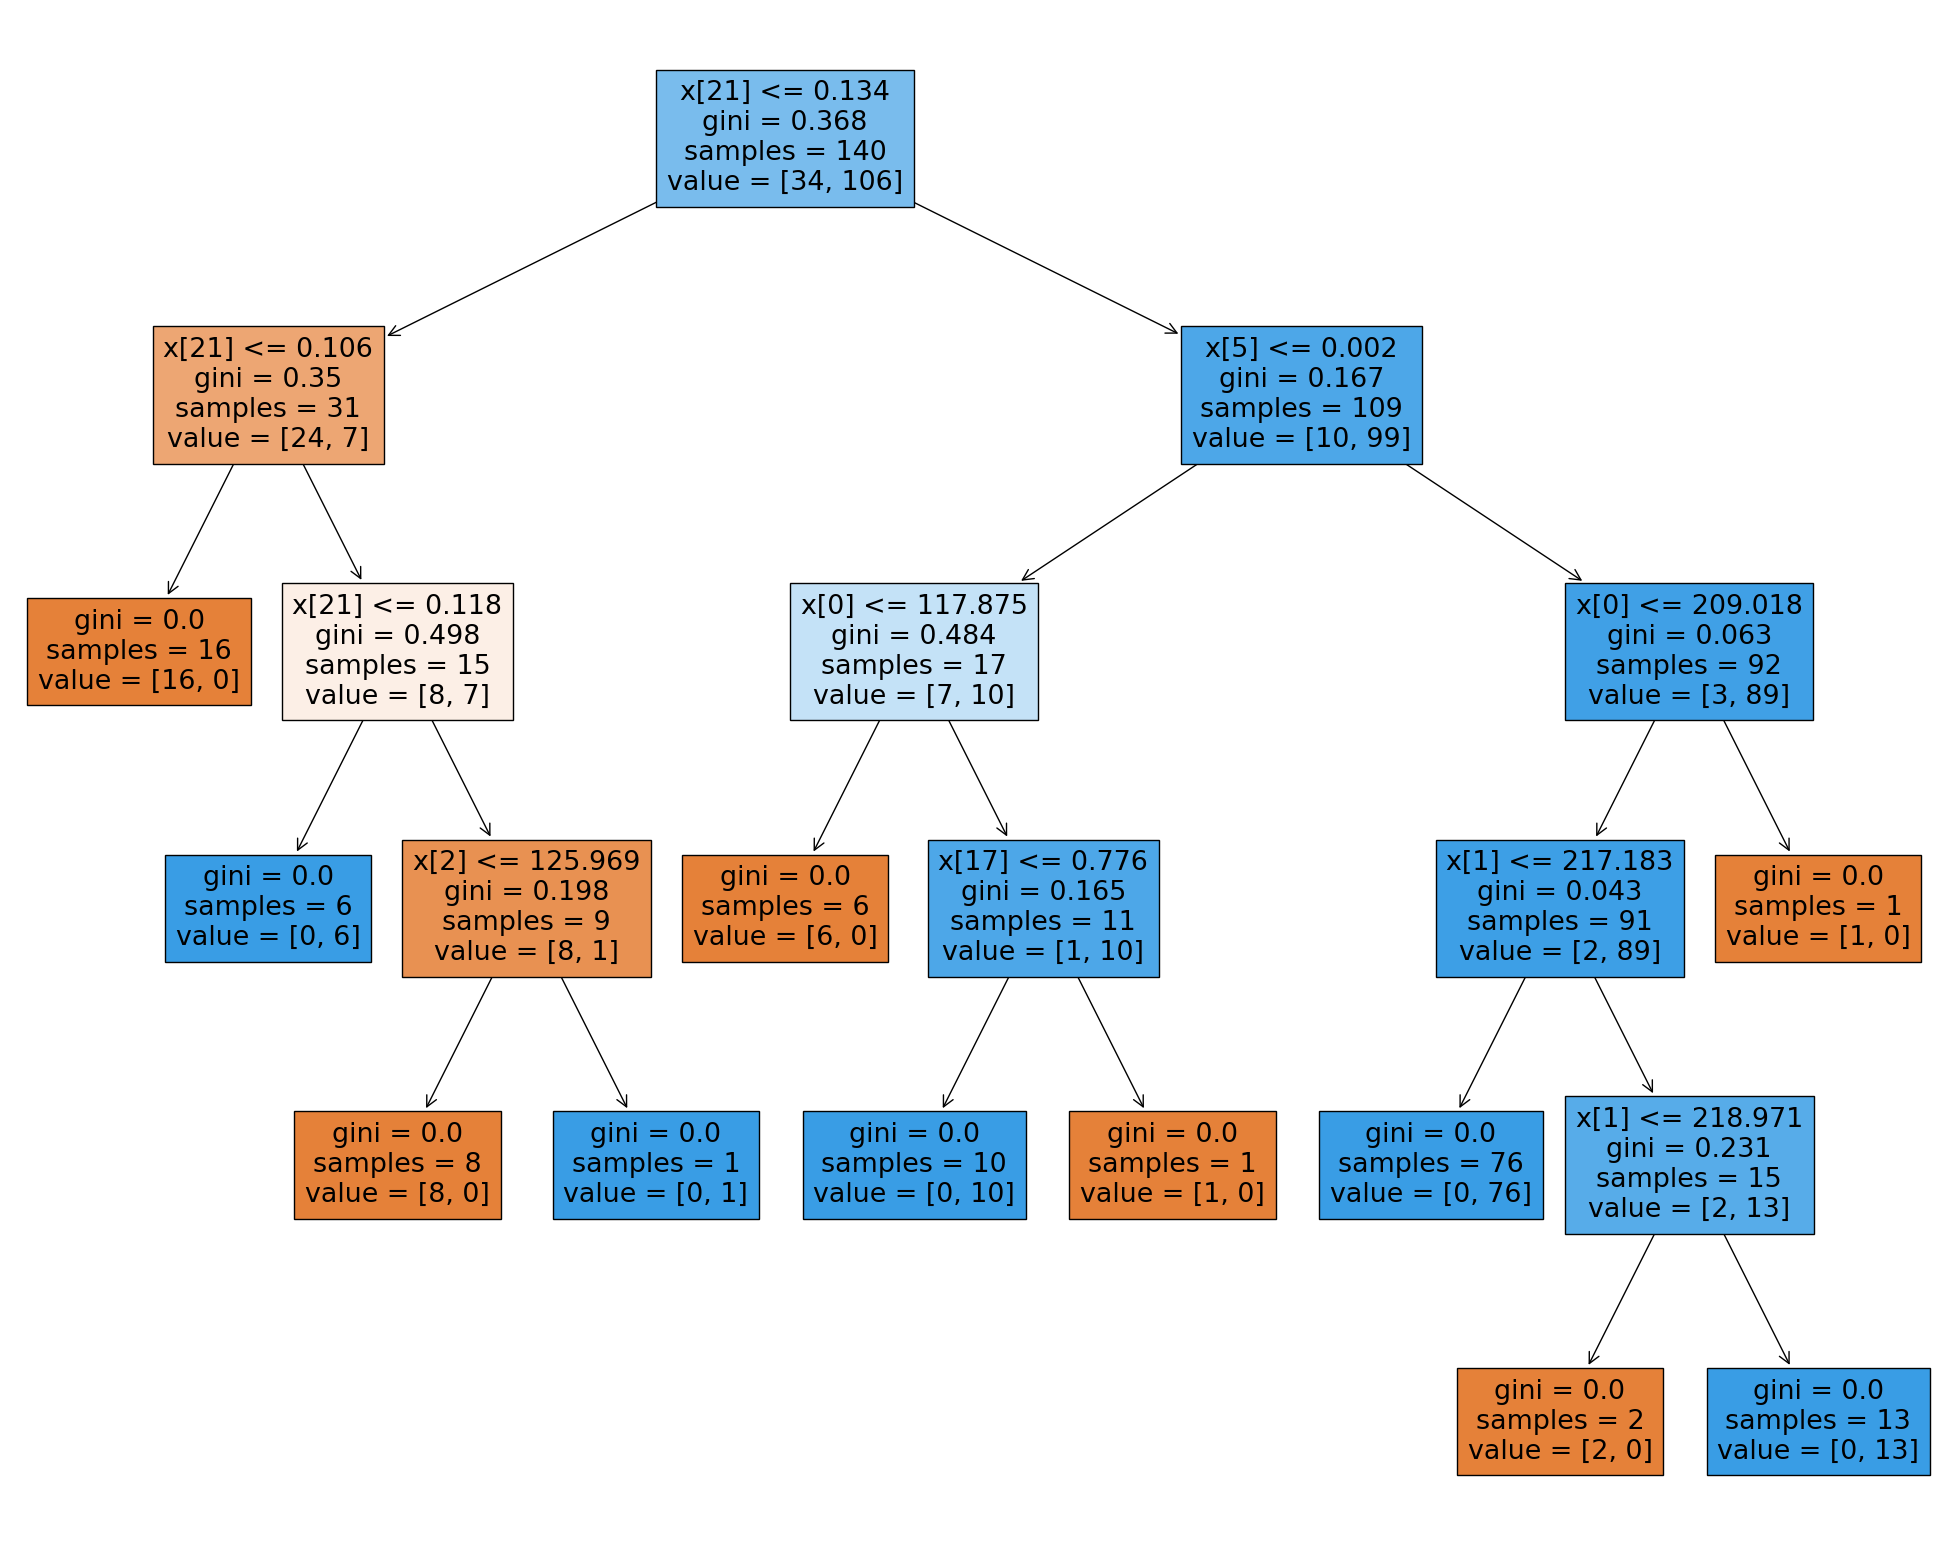

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
plot_tree(dt_clf, filled=True)
plt.show()

In [ ]:
treee=DecisionTreeClassifier(max_depth=6)
treee.fit(X_train,y_train)
print("tree nodes and tree layers of decision tree:")
treee.tree_.node_count, treee.tree_.max_depth

tree nodes and tree layers of decision tree:


(21, 5)

Feature importance

In [ ]:
# which attributes are the biggest predictors of those affected and unaffected by parkinsons
print("features\n",feature_cols)
print("\nnumber of features\n", len(feature_cols))
print("\nfeature importances\n",dt_clf.feature_importances_)

features
 ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

number of features
 22

feature importances
 [0.1613918  0.07598395 0.03452954 0.         0.         0.08012894
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0353143
 0.         0.         0.         0.61265148]


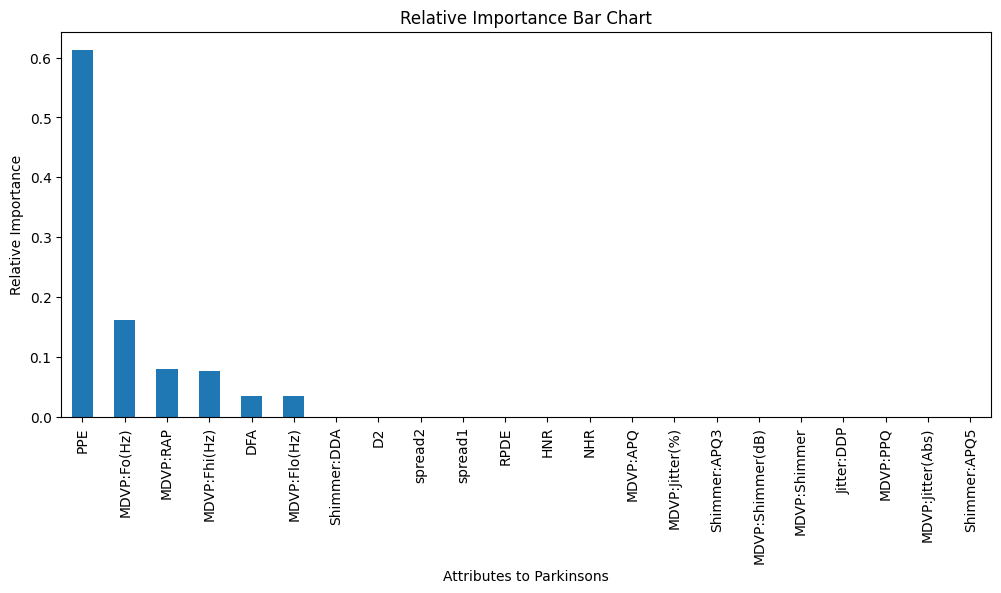

In [ ]:
feature_imp = pd.Series(dt_clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar')
ax.set(title='Relative Importance Bar Chart')
ax.set(xlabel='Attributes to Parkinsons')
ax.set(ylabel='Relative Importance')
plt.show()

##**Model evaluation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
def measure_error(y_true, y_pred, label):
  return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
  'precision': precision_score(y_true, y_pred),
  'recall': recall_score(y_true, y_pred),
  'f1': f1_score(y_true, y_pred)},
  name=label)
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
measure_error(y_test, y_test_pred, 'test')],axis=1)
train_test_full_error

,train,test
accuracy,1.0,0.872727
precision,1.0,0.925000
recall,1.0,0.902439
f1,1.0,0.913580


In [ ]:
print(classification_report(y_test,y_test_pred))
accry = accuracy_score(y_test,y_test_pred)
print("accuracy score:\t",accry)

              precision    recall  f1-score   support

       False       0.73      0.79      0.76        14
        True       0.93      0.90      0.91        41

    accuracy                           0.87        55
   macro avg       0.83      0.84      0.84        55
weighted avg       0.88      0.87      0.87        55

accuracy score:	 0.8727272727272727


In [ ]:
cm=confusion_matrix(y_test,y_test_pred)

array([[11,  3],
       [ 4, 37]])

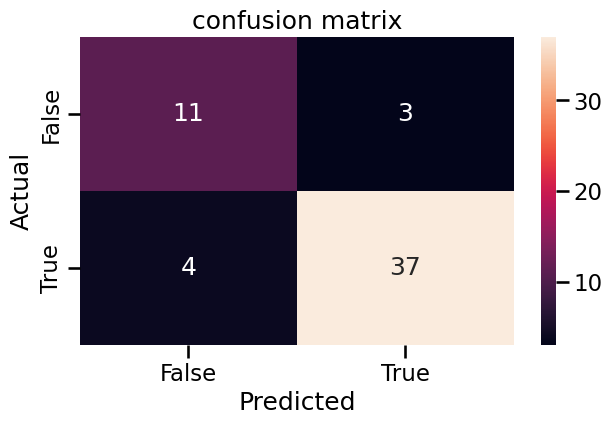

In [ ]:
import seaborn as sns
sns.set_context('talk')
plt.rcParams['figure.figsize'] = [7, 4]
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_title('confusion matrix');
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

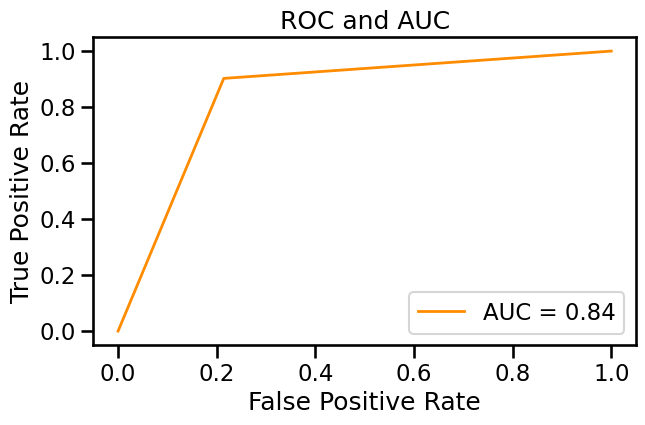

auc score = 0.84408


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_probs = dt_clf.predict_proba(X_test)
y_probs = y_probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=2,label="AUC = %0.2f" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC")
plt.legend(loc="lower right")
plt.show()
auc_score = roc_auc_score(y_test, y_probs)
print("auc score = {:.5f}".format(auc_score))

##**Model optimization**

In [ ]:
from sklearn import metrics
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8545454545454545


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1, dt_clf.tree_.max_depth+1, 2),
'max_features': range(1, len(X_train.columns)+1)}
# create a search and evaluation ranges for depth and features

In [ ]:
for depth in range(1,6):
  opt_model = DecisionTreeClassifier(max_depth=depth)
  opt_model.fit(X_train, y_train)
  accuracy = opt_model.score(X_test, y_test)
  print('max_depth={}, accuracy={}'.format(depth, accuracy))

max_depth=1, accuracy=0.8363636363636363
max_depth=2, accuracy=0.8363636363636363
max_depth=3, accuracy=0.8909090909090909
max_depth=4, accuracy=0.8545454545454545
max_depth=5, accuracy=0.8363636363636363


In [ ]:
gr_dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42),
param_grid=param_grid,
scoring='accuracy',
n_jobs=-1)
gr_dt_clf = gr_dt_clf.fit(X_train, y_train)

In [ ]:
gr_dt_clf.best_estimator_.tree_.node_count, gr_dt_clf.best_estimator_.tree_.max_depth

(31, 5)

In [ ]:
gr_dt_clf.best_params_

{'max_depth': 5, 'max_features': 2}

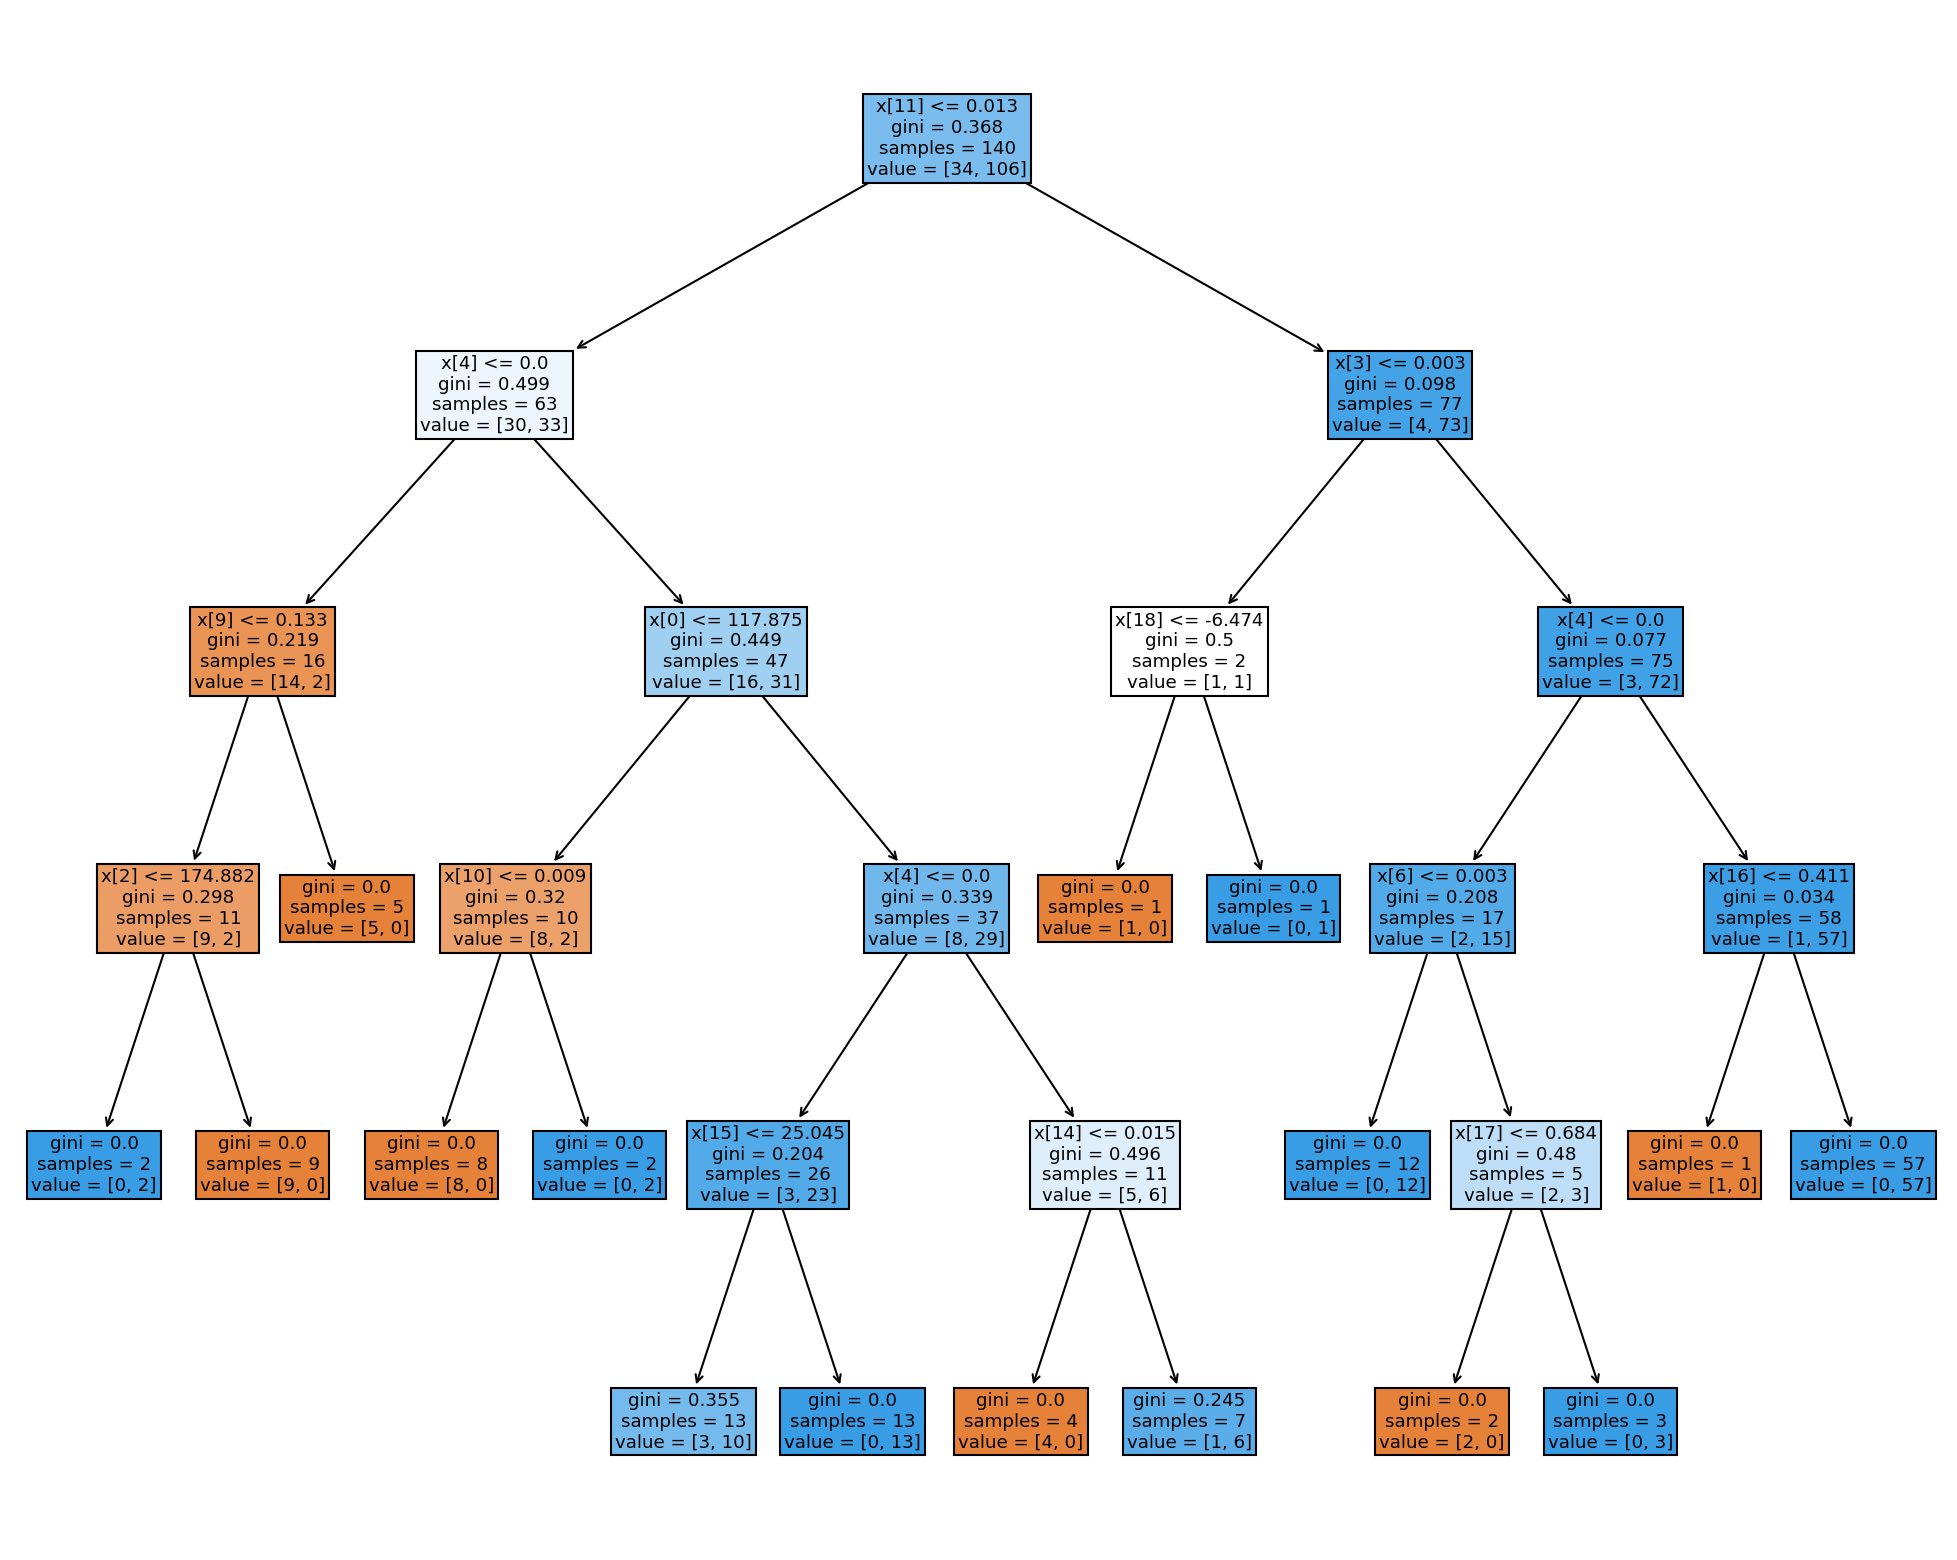

In [ ]:
plt.figure(figsize=(25,20))
plot_tree(gr_dt_clf.best_estimator_, filled=True)
plt.show()

In [ ]:
y_train_pred = gr_dt_clf.best_estimator_.predict(X_train)
y_test_pred = gr_dt_clf.best_estimator_.predict(X_test)
train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
measure_error(y_test, y_test_pred, 'test')],
axis=1)
train_test_full_error

,train,test
accuracy,0.971429,0.927273
precision,0.963636,0.930233
recall,1.000000,0.975610
f1,0.981481,0.952381


In [ ]:
print("features\n",feature_cols)
print("\nnumber of features\n", len(feature_cols))
print("\nfeature importances\n",gr_dt_clf.best_estimator_.feature_importances_)

features
 ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

number of features
 22

feature importances
 [0.11882889 0.         0.07247595 0.01825704 0.19633169 0.
 0.02501131 0.         0.         0.00503305 0.07086538 0.27621391
 0.         0.         0.08282966 0.01533145 0.04352722 0.05314903
 0.02214543 0.         0.         0.        ]


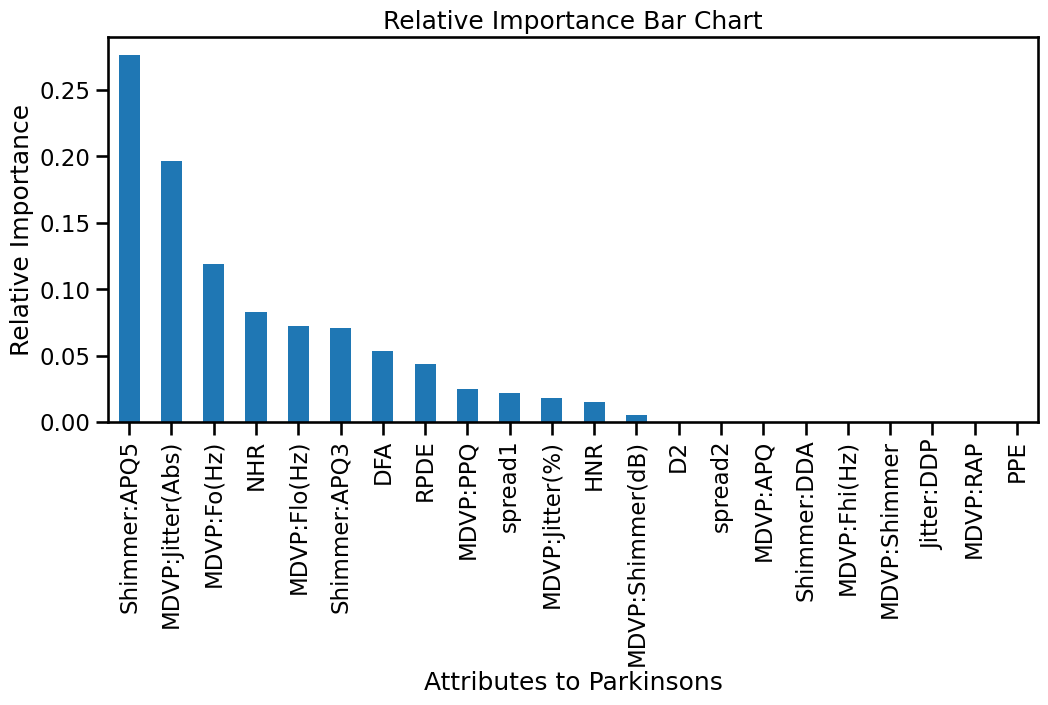

In [ ]:
feature_imp = pd.Series(gr_dt_clf.best_estimator_.feature_importances_, index=feature_cols).sort_values(ascending=False)
fig = plt.figure(figsize=(12,5))
ax = feature_imp.plot(kind='bar')
ax.set(title='Relative Importance Bar Chart')
ax.set(xlabel='Attributes to Parkinsons')
ax.set(ylabel='Relative Importance')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[11,  3],
       [ 1, 40]])

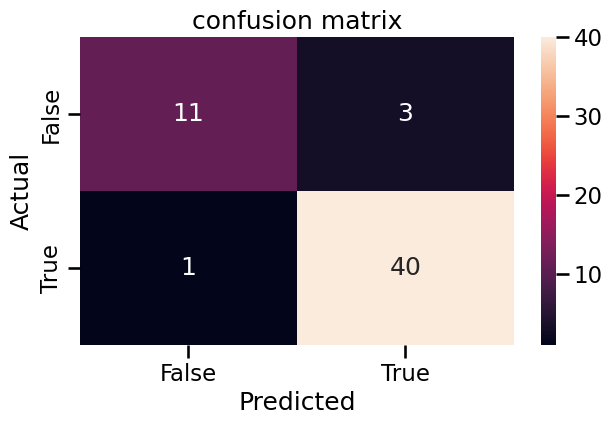

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)
sns.set_context('talk')
plt.rcParams['figure.figsize'] = [7, 4]
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['False', 'True']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_title('confusion matrix');
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

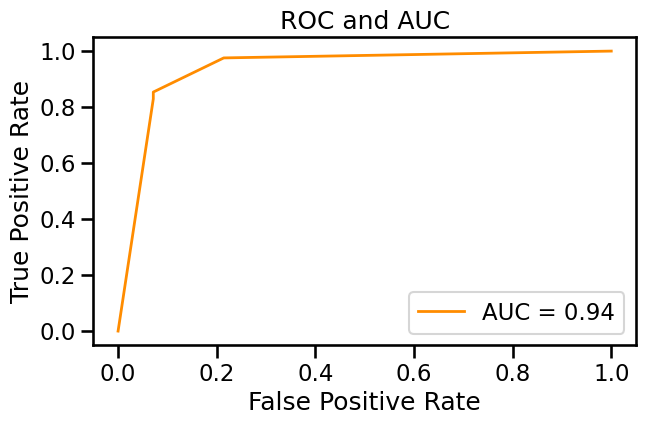

auc score = 0.93641


In [ ]:
y_probs = gr_dt_clf.best_estimator_.predict_proba(X_test)
y_probs = y_probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr,tpr,color="darkorange",lw=2,label="AUC = %0.2f" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC")
plt.legend(loc="lower right")
plt.show()
auc_score = roc_auc_score(y_test, y_probs)
print("auc score = {:.5f}".format(auc_score))

In [ ]:
y_train_pred = gr_dt_clf.predict(X_train)
y_train_pred_prob = gr_dt_clf.predict_proba(X_train)
y_test_pred = gr_dt_clf.predict(X_test)
y_test_pred_prob = gr_dt_clf.predict_proba(X_test)
y_train_scores = y_train_pred_prob[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores)

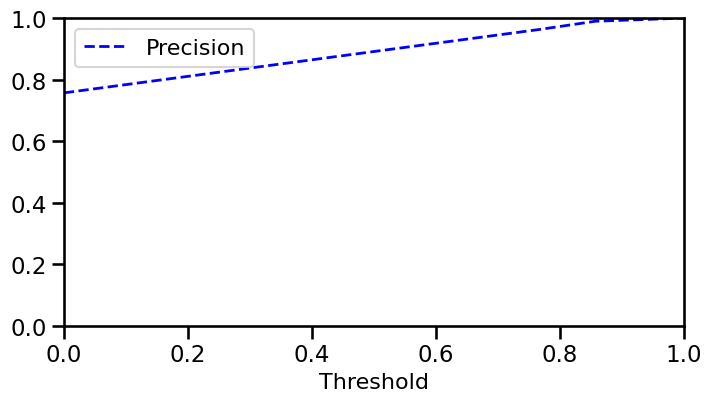

In [ ]:
def plot_precision_recall_curve(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.xlabel("Threshold", fontsize=16)
  plt.legend(loc="upper left", fontsize=16)
  plt.xlim([0, 1])
  plt.ylim([0, 1])
plt.figure(figsize=(8, 4))
plot_precision_recall_curve(precisions, recalls, thresholds)
plt.show()

In [ ]:
result = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_test_pred)
print("\nClassification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  3]
 [ 1 40]]

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.79      0.85        14
        True       0.93      0.98      0.95        41

    accuracy                           0.93        55
   macro avg       0.92      0.88      0.90        55
weighted avg       0.93      0.93      0.93        55

Accuracy: 0.9272727272727272


##**Make prediction**

In [ ]:
# from sklearn.neighbors import NearestNeighbors as knn

In [ ]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,True,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,True,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,True,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,True,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,True,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,False,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,False,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,False,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,False,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#(target value to be predicted)
y_Train = data["status"]
# Remove column from input variables
X_Train = data.drop("status", axis=1)

In [ ]:
# Expected result is 1 (likely) and 0 (unlikely)
like=0
unlike=0
XTest = pd.DataFrame(data.drop("status", axis=1))
# Iterate through each row and do the predicton
for index, row in XTest.iterrows():
  if gr_dt_clf.predict(row.values.reshape(1, -1))[0] == 0:
    unlike+=1
    print("Patient {} not likely to have parkinsons".format(index))
  else:
    like+=1
    print("Patient {} likely to have parkinsons".format(index))

Patient 0 likely to have parkinsons
Patient 1 likely to have parkinsons
Patient 2 likely to have parkinsons
Patient 3 likely to have parkinsons
Patient 4 likely to have parkinsons
Patient 5 likely to have parkinsons
Patient 6 likely to have parkinsons
Patient 7 not likely to have parkinsons
Patient 8 likely to have parkinsons
Patient 9 likely to have parkinsons
Patient 10 likely to have parkinsons
Patient 11 likely to have parkinsons
Patient 12 likely to have parkinsons
Patient 13 likely to have parkinsons
Patient 14 likely to have parkinsons
Patient 15 likely to have parkinsons
Patient 16 likely to have parkinsons
Patient 17 likely to have parkinsons
Patient 18 likely to have parkinsons
Patient 19 likely to have parkinsons
Patient 20 likely to have parkinsons
Patient 21 likely to have parkinsons
Patient 22 likely to have parkinsons
Patient 23 likely to have parkinsons
Patient 24 likely to have parkinsons
Patient 25 likely to have parkinsons
Patient 26 likely to have parkinsons
Patient

In [ ]:
# using pre-existing data
print("{} of patients likely to have parkinsons\n{} of patients unlikely to have parkinsons".format(like, unlike))
print("\n{:.2f}% of patients likely to have parkinsons\n{:.2f}% of patients unlikely to have parkinsons".format(like/195*100, unlike/195*100))

153 of patients likely to have parkinsons
42 of patients unlikely to have parkinsons

78.46% of patients likely to have parkinsons
21.54% of patients unlikely to have parkinsons


In [ ]:
#insert new data
X = np.array([[182.93777083333336,             220.63675,    142.20729166666666,
  0.003866041666666667,         0.000013,       0.0019722508591065295,
 0.0020560416666666665,  0.005776041666666666,  0.017615208333333333,
   0.16295833333333334,  0.009503541666666667,  0.010508541666666668,
  0.013304791666666668,  0.028511458333333333,  0.011482708333333333,
    24.678749999999997,   0.44337271502590675,    0.6957155625000001,
    -6.759263874999999,   0.16029200000000002,    2.1544907291666666,
   0.12301710416666667],[145.1807619047619,    188.25462634125816,    106.91090960095379,
  0.006989251700680272, 0.00006,  0.003757482993197279,
  0.003900340136054422,  0.011273061224489796,    0.0335398635949225,
   0.32120408163265307,   0.01767578231292517,   0.02028469387755102,
  0.027600408163265307,  0.053149761554106174,  0.029210952380952383,
    20.974047619047617,    0.5173846416411124,    0.7254079387755102,
    -5.333419721088435,   0.24813266666666667,    2.4560580408163264,
    0.2338282244897959]])
#predict
targetNames = ['False','True']
y_probs = gr_dt_clf.predict_proba(X)
predict = gr_dt_clf.predict(X)
print("predictions")
for c in predict:
  print("patient X likely has parkinsons ;",targetNames[c])
print("\nprediction probability\n",y_probs)

predictions
patient X likely has parkinsons ; False
patient X likely has parkinsons ; True

prediction probability
 [[1. 0.]
 [0. 1.]]


#Summary

*Key considerations for model optimization*

Data preprocessing using .fillna() to ensure that data is complete; more data to work with to improve performance. Tuning hyperparameters ensuring that the model has the most optimal combination of hyperparameters to maximise performance. I.e. Higher AUC score, higher accuracy, and appropriate confusion matrix suited to the case.